In [17]:
from rdkit import Chem
from rdkit.Chem import Draw

import rdkit.Chem.AllChem as Chem
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

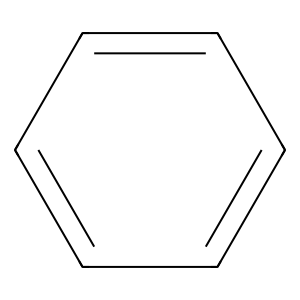

In [31]:
def generate_structure_from_smiles(molecule):

    mol = Chem.AddHs(molecule)

    status = AllChem.EmbedMolecule(mol)
    status = AllChem.UFFOptimizeMolecule(mol)

    conformer = mol.GetConformer()
    coordinates = conformer.GetPositions()
    coordinates = np.array(coordinates)
    
    return coordinates 

benzene = Chem.MolFromSmiles('c1ccccc1')
coords = generate_structure_from_smiles(benzene)

img = Draw.MolToImage(benzene)
img

In [32]:
trace = go.Scatter3d(
    x=coords[:, 2],  # Z-axis
    y=coords[:, 1],  # Y-axis
    z=coords[:, 0],  # X-axis
    mode='markers',
)
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Z Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='X Axis'),
    ),
    margin=dict(l=0, r=0, b=0, t=0)  # Adjust margins as needed
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [55]:
import plotly.graph_objs as go

def FCC_Structure(scale_factor):
    vertices = []
    for x in range(3):
        for y in range(3):
            for z in range(3):
                vertices.append((x * scale_factor, y * scale_factor, z * scale_factor))
    return vertices

# Generating the vertices of a 3x3x3 cube
cube_vertices = FCC_Structure((5.59/2))

# Extracting x, y, z coordinates for plotting
x_coords, y_coords, z_coords = zip(*cube_vertices)

# Creating a scatter3d trace for the cube vertices
trace = go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',  # Change the color if desired
        opacity=0.8
    )
)

# Creating layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis')
    )
)

# Creating the figure and plotting the cube vertices
fig = go.Figure(data=[trace], layout=layout)

# Displaying the plot
fig.show()


In [57]:
import plotly.graph_objs as go

def NaCl_Structure(scale_factor):
    vertices = []
    for x in range(3):
        for y in range(3):
            for z in range(3):
                # Even indices represent sodium (Na) ions, odd indices represent chloride (Cl) ions
                if (x + y + z) % 2 == 0:
                    vertices.append((x * scale_factor, y * scale_factor, z * scale_factor, 'Na'))  # Sodium ion
                else:
                    vertices.append((x * scale_factor, y * scale_factor, z * scale_factor, 'Cl'))  # Chloride ion
    return vertices

# Generating the vertices of a 2x2x2 NaCl lattice
nacl_vertices = NaCl_Structure((5.59/2))

# Extracting x, y, z coordinates and ion types for plotting
x_coords, y_coords, z_coords, ion_types = zip(*nacl_vertices)

# Creating a scatter3d trace for the NaCl lattice
trace = go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,
        color=[('blue' if ion == 'Na' else 'green') for ion in ion_types]  # Na ions in blue, Cl ions in green
    ),
    text=ion_types,  # Show ion types on hover
)

# Creating layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis')
    )
)

# Creating the figure and plotting the NaCl lattice
fig = go.Figure(data=[trace], layout=layout)

# Displaying the plot
fig.show()


In [52]:
import plotly.graph_objs as go

# Define the lattice constant (edge length of the unit cell)
lattice_constant = 1.0  # Change this to the desired lattice constant

# Define the positions of sodium (Na) and chlorine (Cl) ions within the unit cell
sodium_positions = [(0, 0, 0), (0.5, 0.5, 0), (0.5, 0, 0.5), (0, 0.5, 0.5)]
chlorine_positions = [(0.5, 0, 0), (0, 0.5, 0), (0, 0, 0.5), (0.5, 0.5, 0.5)]

# Scale the positions based on the lattice constant
scaled_sodium_positions = [(x * lattice_constant, y * lattice_constant, z * lattice_constant) for x, y, z in sodium_positions]
scaled_chlorine_positions = [(x * lattice_constant, y * lattice_constant, z * lattice_constant) for x, y, z in chlorine_positions]

# Extracting x, y, z coordinates for plotting
x_sodium, y_sodium, z_sodium = zip(*scaled_sodium_positions)
x_chlorine, y_chlorine, z_chlorine = zip(*scaled_chlorine_positions)

# Create scatter3d traces for sodium and chlorine ions
trace_sodium = go.Scatter3d(
    x=x_sodium,
    y=y_sodium,
    z=z_sodium,
    mode='markers',
    marker=dict(
        size=8,
        color='blue',  # Sodium ions color
        symbol='circle',
        opacity=0.8
    ),
    name='Sodium (Na) ions'
)

trace_chlorine = go.Scatter3d(
    x=x_chlorine,
    y=y_chlorine,
    z=z_chlorine,
    mode='markers',
    marker=dict(
        size=8,
        color='green',  # Chlorine ions color
        symbol='circle',
        opacity=0.8
    ),
    name='Chlorine (Cl) ions'
)

# Create layout for the plot
layout = go.Layout(
    title='Unit Cell for NaCl Crystal Structure',
    scene=dict(
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis'),
        zaxis=dict(title='Z Axis')
    )
)

# Create the figure and plot the unit cell for NaCl
fig = go.Figure(data=[trace_sodium, trace_chlorine], layout=layout)

# Display the plot
fig.show()
